<a href="https://colab.research.google.com/github/Ishraqalibon/Statistics_For_ML/blob/main/statistics_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*PMF*

In [ ]:
import pandas as pd
import random
import numpy as np

In [ ]:
p=[]
for i in range(10000):
    p.append(random.randint(1,6))

In [ ]:
p[:5]

[5, 2, 5, 6, 4]

In [ ]:
data=(pd.Series(p).value_counts()/pd.Series(p).value_counts().sum()).sort_index()

In [ ]:
data

,count
1,0.1662
2,0.1641
3,0.1701
4,0.1667
5,0.1688
6,0.1641


<Axes: >

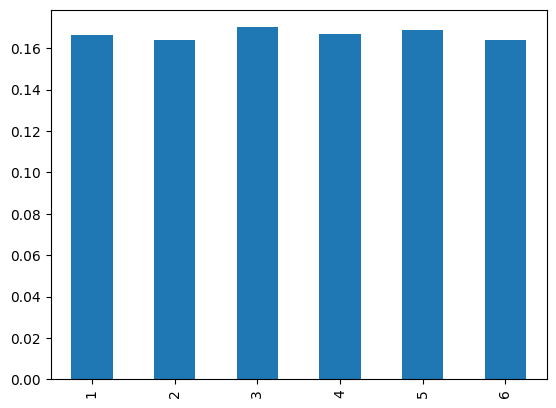

In [ ]:
data.plot(kind='bar')

this is also uniform distribution

In [ ]:
d=[]
for i in range(10000):
    w=random.randint(1,6)
    f=random.randint(1,6)
    d.append(w+f)

In [ ]:
data_2=(pd.Series(d).value_counts()/pd.Series(d).value_counts().sum()).sort_index()

<Axes: >

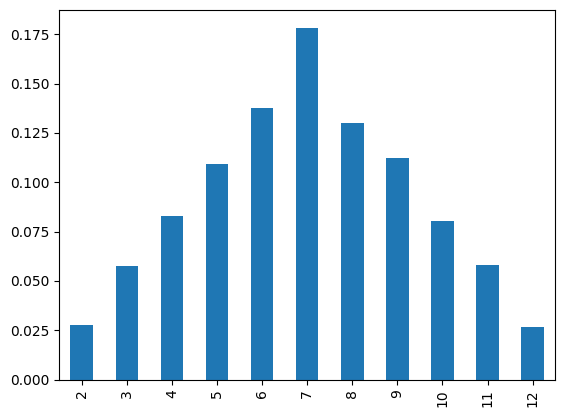

In [ ]:
data_2.plot(kind='bar')

**CDF of PMF**

<Axes: >

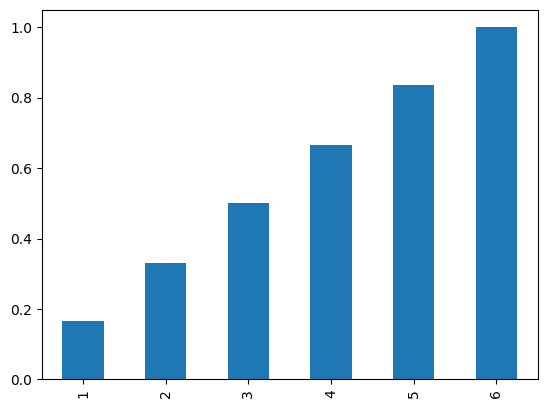

In [ ]:
np.cumsum(data).plot(kind='bar')

<Axes: >

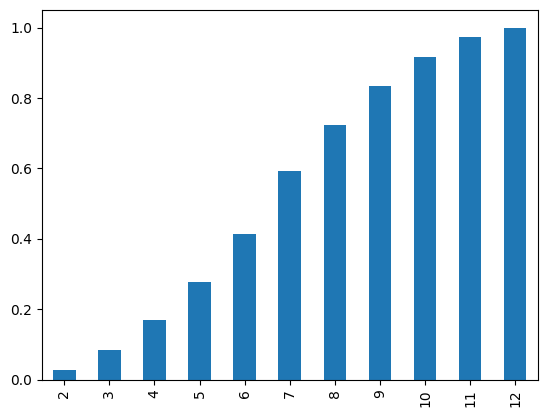

In [ ]:
np.cumsum(data_2).plot(kind='bar')

**Paramtric Density Distribution**

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import normal
sample=normal(loc=50,scale=5,size=1000)

In [ ]:
sample.mean()

50.05388981317774

(array([  7.,  23., 102., 200., 269., 236., 127.,  34.,   1.,   1.]),
 array([33.773568  , 37.2997093 , 40.82585059, 44.35199188, 47.87813317,
        51.40427446, 54.93041576, 58.45655705, 61.98269834, 65.50883963,
        69.03498093]),
 <BarContainer object of 10 artists>)

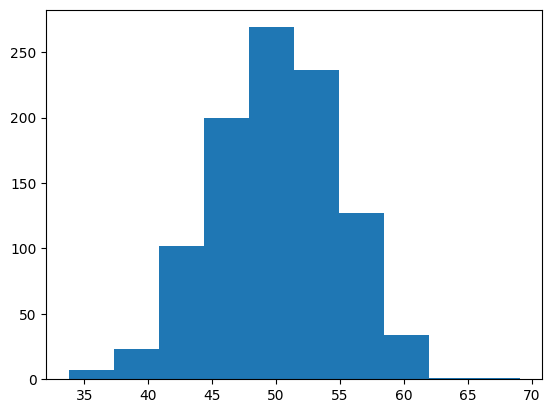

In [ ]:
plt.hist(sample,bins=10)

In [ ]:
sample_mean= sample.mean()
sample_std=sample.std()

In [ ]:
from scipy.stats import norm
dis=norm(sample_mean,sample_std)

In [ ]:
value=np.linspace(sample.min(),sample.max(),100)

In [ ]:
pdf= [dis.pdf(v) for v in value]

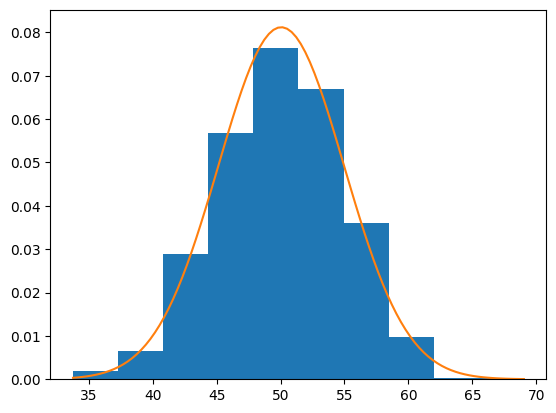

In [ ]:
plt.hist(sample,bins=10, density=True)
plt.plot(value,pdf)

<ipython-input-20-8cd219d00d27>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

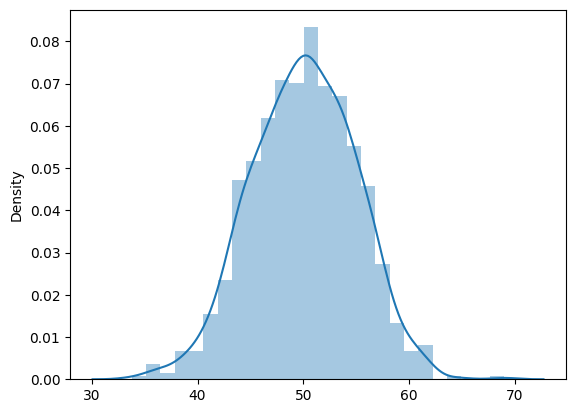

In [ ]:
import seaborn as sns
sns.distplot(sample)

**Kernel Density Estimator (KDE)**

In [ ]:
sample_1=normal(loc=20,scale=5,size=300)
sample_2=normal(loc=40,scale=5,size=700)
sample_v2=np.hstack((sample_1,sample_2))

(array([ 2.,  2.,  4.,  3.,  6.,  8.,  7., 11., 19., 29., 16., 15., 13.,
        28., 27., 21., 20., 16., 16.,  6., 14.,  8.,  7.,  5., 14., 13.,
        18., 25., 31., 39., 40., 52., 58., 68., 48., 45., 62., 39., 42.,
        29., 24., 17., 15.,  8.,  4.,  3.,  2.,  0.,  0.,  1.]),
 array([ 6.51537678,  7.50463094,  8.4938851 ,  9.48313925, 10.47239341,
        11.46164757, 12.45090173, 13.44015588, 14.42941004, 15.4186642 ,
        16.40791835, 17.39717251, 18.38642667, 19.37568083, 20.36493498,
        21.35418914, 22.3434433 , 23.33269746, 24.32195161, 25.31120577,
        26.30045993, 27.28971408, 28.27896824, 29.2682224 , 30.25747656,
        31.24673071, 32.23598487, 33.22523903, 34.21449319, 35.20374734,
        36.1930015 , 37.18225566, 38.17150981, 39.16076397, 40.15001813,
        41.13927229, 42.12852644, 43.1177806 , 44.10703476, 45.09628892,
        46.08554307, 47.07479723, 48.06405139, 49.05330554, 50.0425597 ,
        51.03181386, 52.02106802, 53.01032217, 53.99957633,

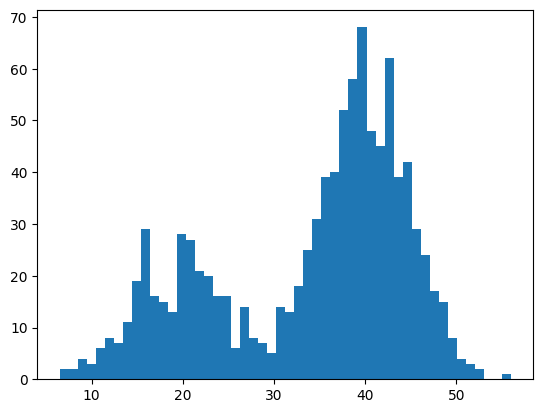

In [ ]:
plt.hist(sample_v2,bins=50)

In [ ]:
from sklearn.neighbors import KernelDensity
model=KernelDensity(bandwidth=3,kernel='gaussian')
sample_v2=sample_v2.reshape(len(sample_v2),1)
model.fit(sample_v2)

KernelDensity(bandwidth=3)

In [ ]:
value_v2=np.linspace(sample_v2.min(),sample_v2.max(),100)
value_v2=value_v2.reshape(len(value_v2),1)

In [ ]:
porb=model.score_samples(value_v2)
prob=np.exp(porb)

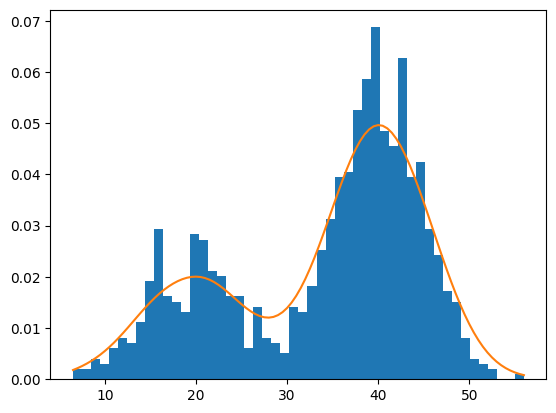

In [ ]:
plt.hist(sample_v2,bins=50, density=True)
plt.plot(value_v2,prob)
plt.show()

<Axes: ylabel='Density'>

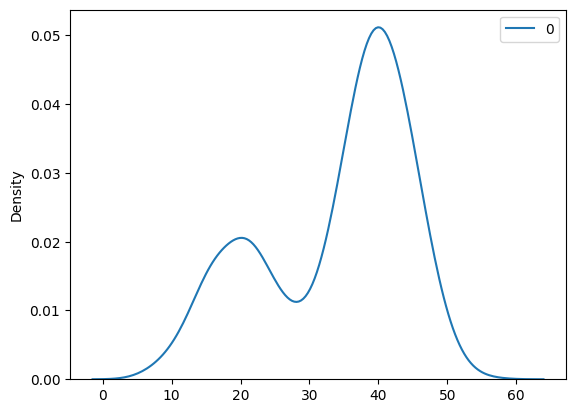

In [ ]:
sns.kdeplot(sample_v2)

**How to use PDF in data science**

In [ ]:
df=sns.load_dataset('iris')

In [ ]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

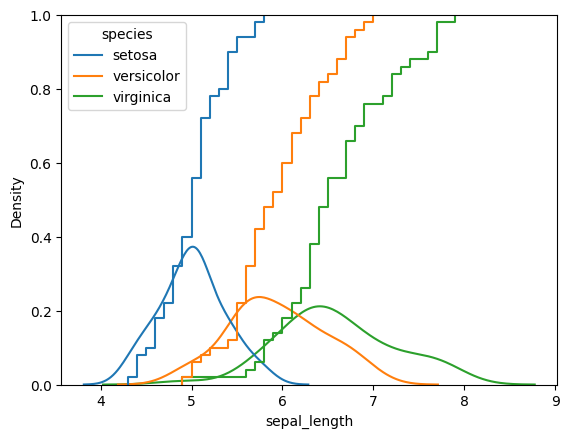

In [ ]:
sns.kdeplot(data=df,x='sepal_length',hue='species')
sns.ecdfplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

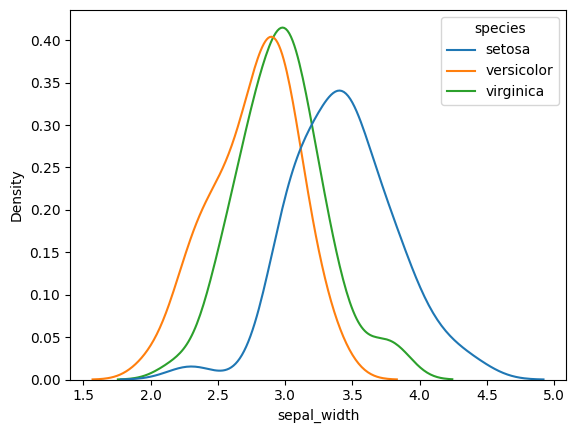

In [ ]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

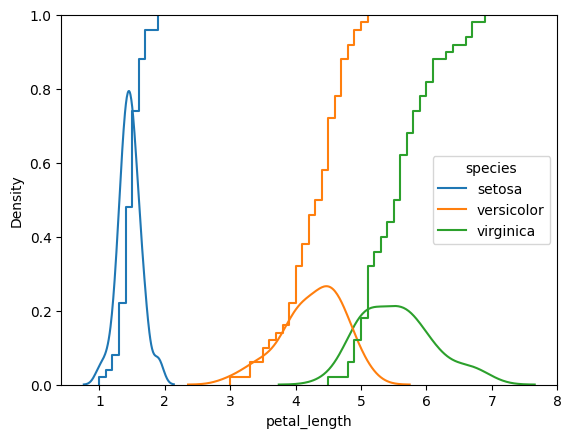

In [ ]:
sns.kdeplot(data=df,x='petal_length',hue='species')
sns.ecdfplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

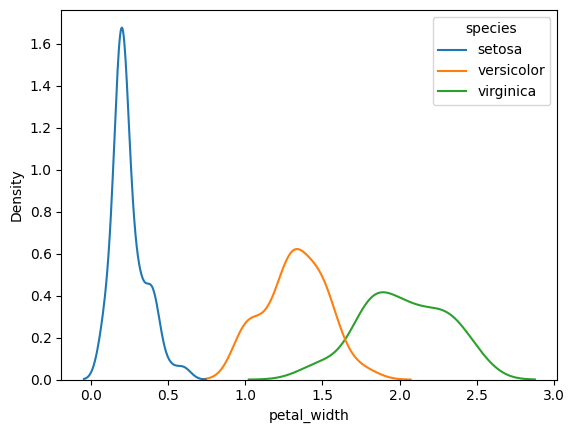

In [ ]:
sns.kdeplot(data=df,x='petal_width',hue='species')

**2D Density**

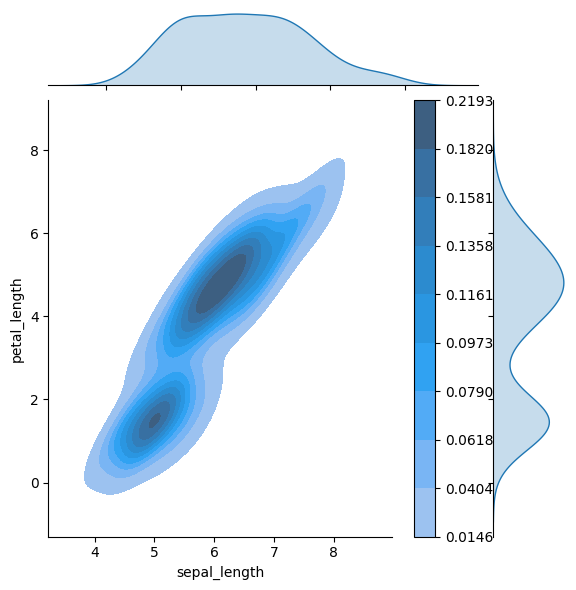

In [ ]:
sns.jointplot(data=df,x='sepal_length',y='petal_length',kind='kde',fill=True,cbar=True)

**QQ Plot**

In [ ]:
import statsmodels.api as sm

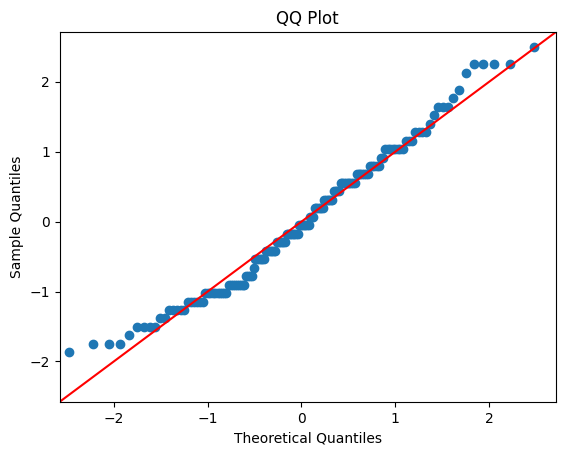

In [ ]:
fig= sm.qqplot(df['sepal_length'],line='45',fit=True)
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

**Pareto Distribution**

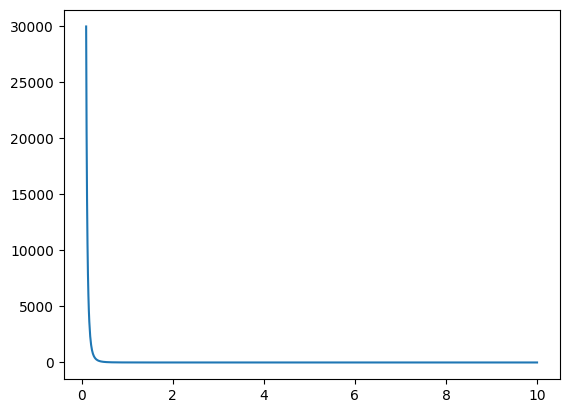

In [ ]:

# Define the parameters of the Pareto distribution
alpha = 3
xm = 1

# Create an array of x values
p_x = np.linspace(0.1, 10, 1000)

# Calculate the y values of the Pareto distribution
p_y = alpha * (xm**alpha) / (p_x**(alpha+1))


plt.plot(p_x,p_y)

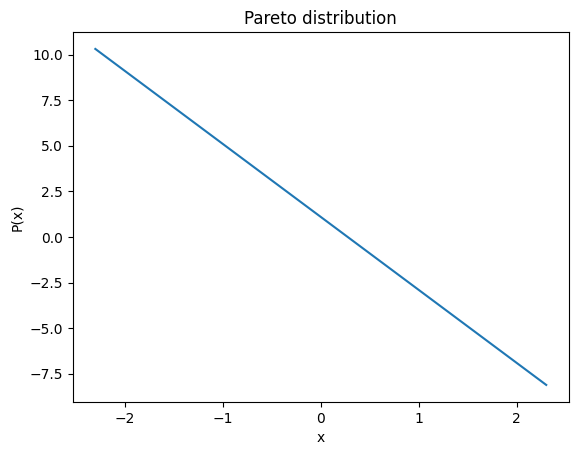

In [ ]:
# Create the log-log plot
plt.plot(np.log(p_x),np.log(p_y))

# Add labels and a title
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Pareto distribution')

# Show the plot
plt.show()

In [ ]:
import scipy.stats as stats
# Define the parameters of the Pareto distribution
alpha = 2
xm = 1

# Generate a set of random data from the Pareto distribution
x = stats.pareto.rvs(b=alpha, scale=xm, size=1000)

(array([884.,  70.,  25.,   7.,   4.,   2.,   2.,   2.,   1.,   3.]),
 array([ 1.00010348,  2.62799472,  4.25588596,  5.88377719,  7.51166843,
         9.13955966, 10.7674509 , 12.39534213, 14.02323337, 15.6511246 ,
        17.27901584]),
 <BarContainer object of 10 artists>)

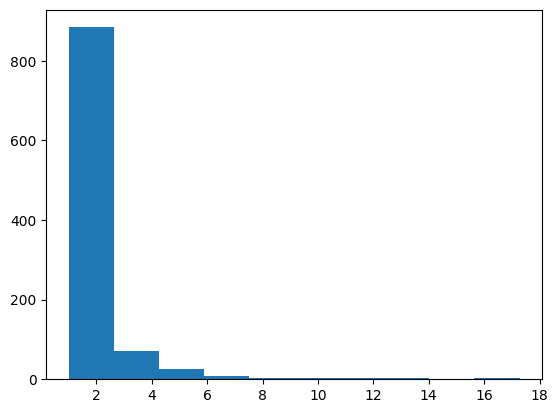

In [ ]:
plt.hist(x)

In [ ]:
# Fit a Pareto distribution to the data
params = stats.pareto.fit(x, floc=0)

# Create a Pareto distribution object with the fitted parameters
dist = stats.pareto(b=params[0], scale=params[2])

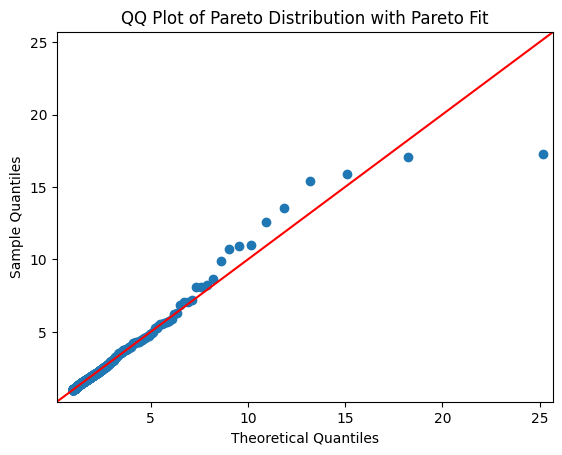

In [ ]:
# Create a QQ plot of the data using the Pareto distribution
fig = sm.qqplot(x, dist=dist, line='45')

# Add a title and labels to the plot
plt.title('QQ Plot of Pareto Distribution with Pareto Fit')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()

**Log Transform**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isna().sum()

,0
Survived,0
Age,0
Fare,0


In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean(),inplace=False)

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<ipython-input-70-1c15e8485d0e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


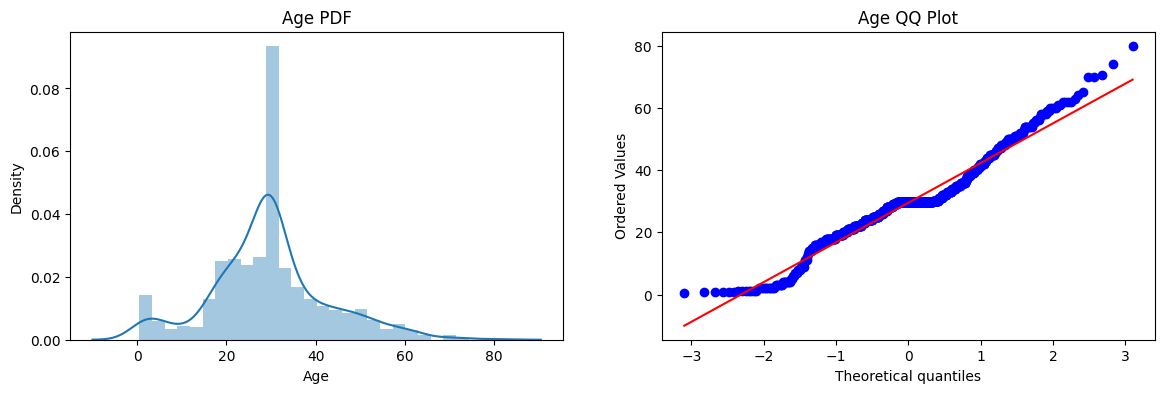

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

<ipython-input-71-921b0fa8d620>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


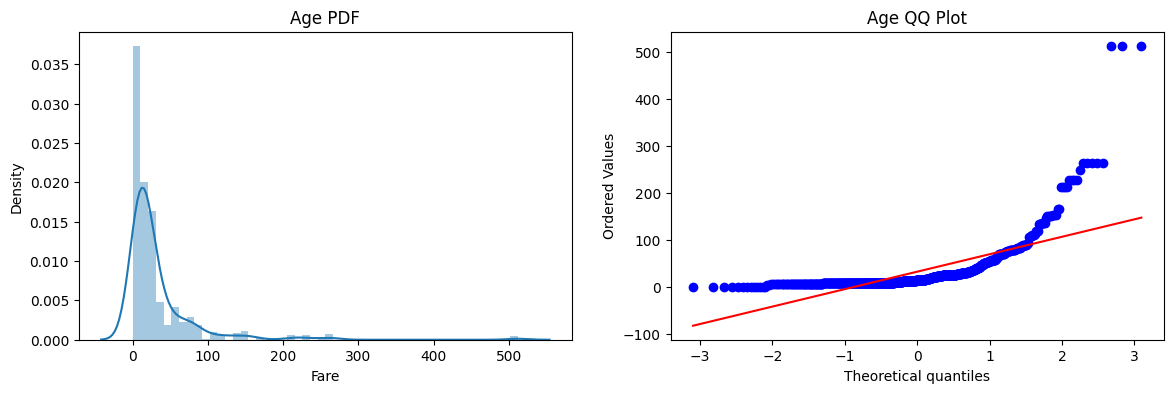

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6536312849162011


In [ ]:
trf = FunctionTransformer(func=np.log1p)

In [ ]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.664804469273743


In [ ]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6554681647940075


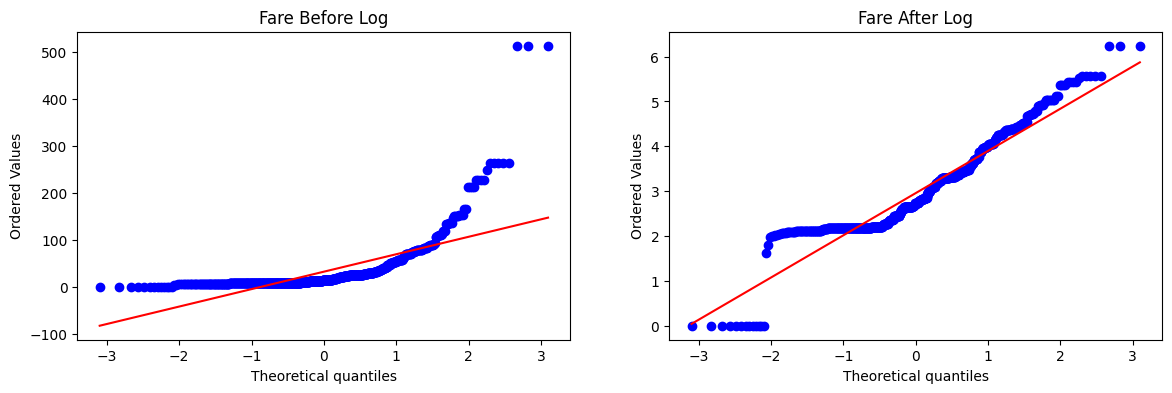

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

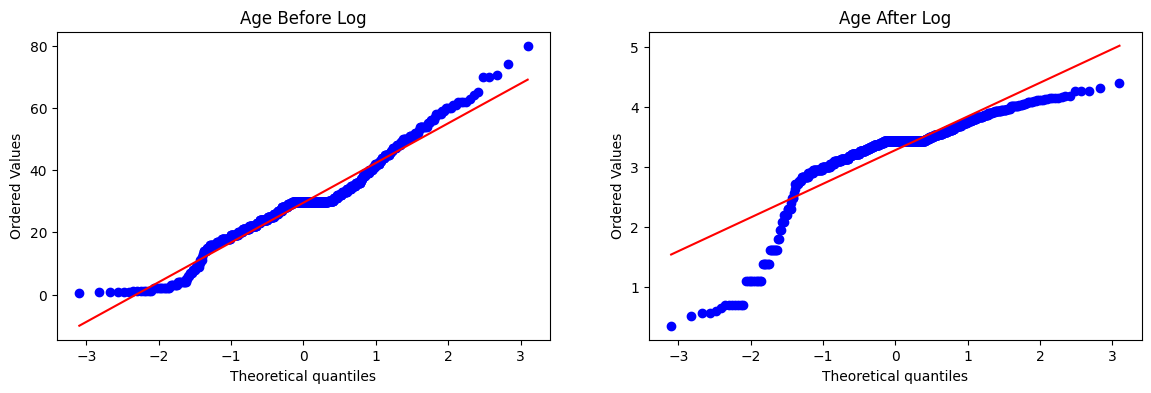

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [ ]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6815642458100558


In [ ]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6599500624219725


In [ ]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6431335830212235


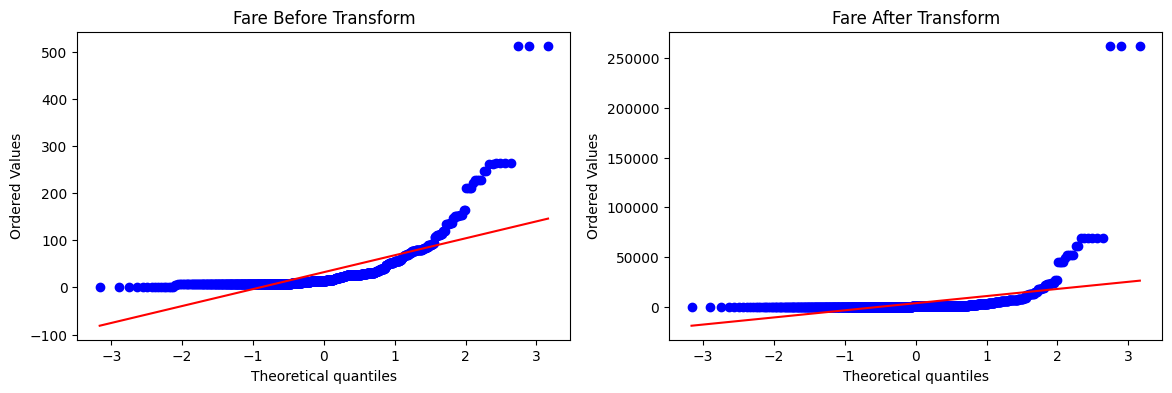

In [ ]:
apply_transform(lambda x:x**2)

Accuracy 0.6262796504369538


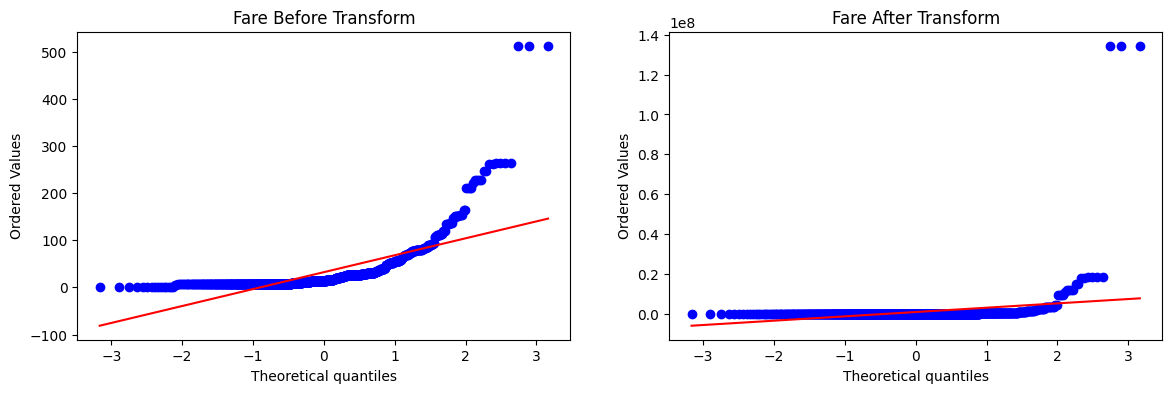

In [ ]:
apply_transform(lambda x:x**3)

Accuracy 0.61729088639201


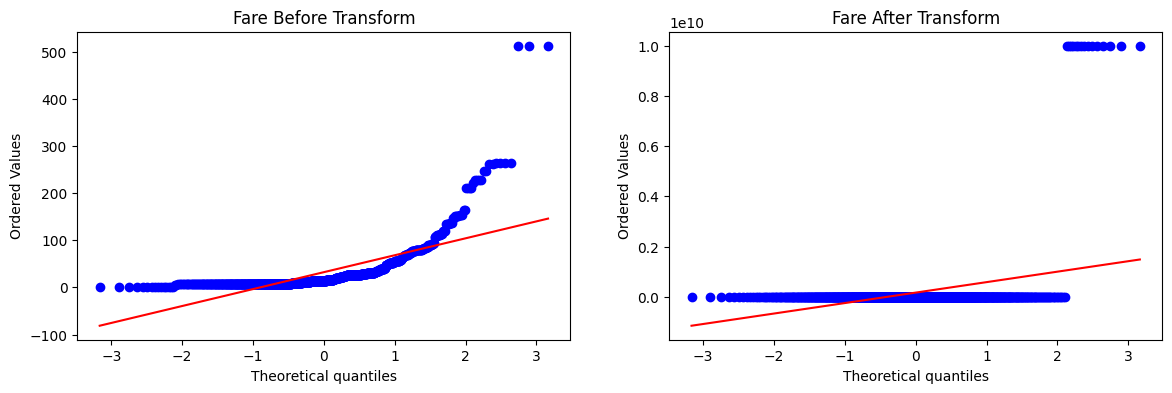

In [ ]:
apply_transform(lambda x:1/(x+.0000000001))

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [ ]:
df = pd.read_csv('/content/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.shape

(1030, 9)

In [ ]:
df.isna().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [ ]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Applying Regression without any transformation
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.627553179231485

In [ ]:
# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.46099404916628606

<ipython-input-96-f1bb624c0378>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


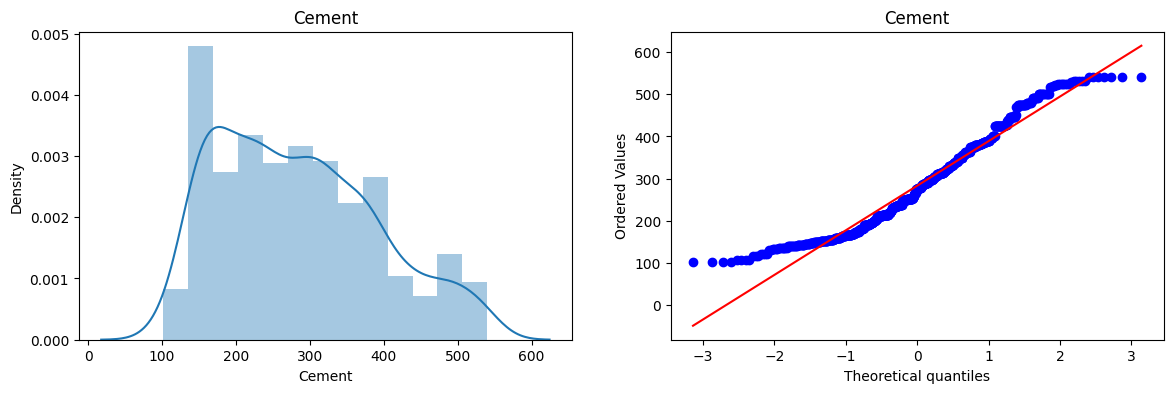

<ipython-input-96-f1bb624c0378>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


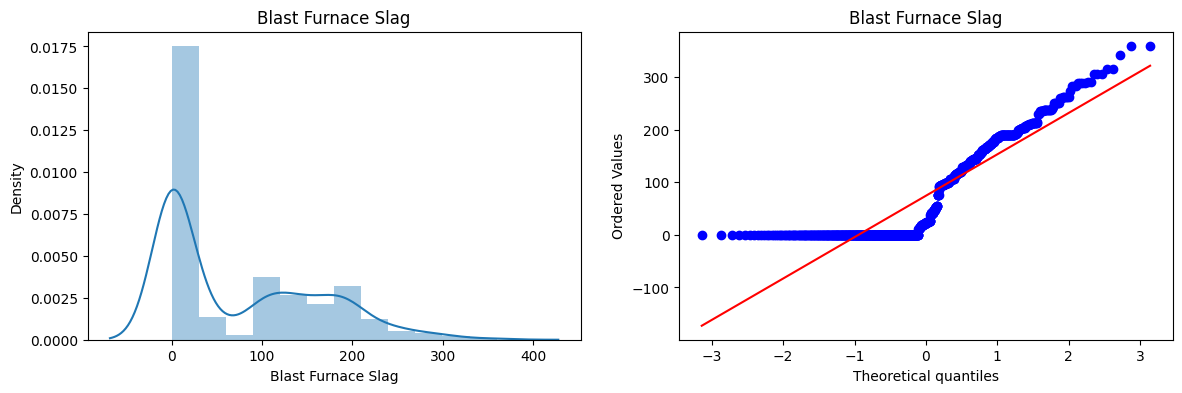

<ipython-input-96-f1bb624c0378>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


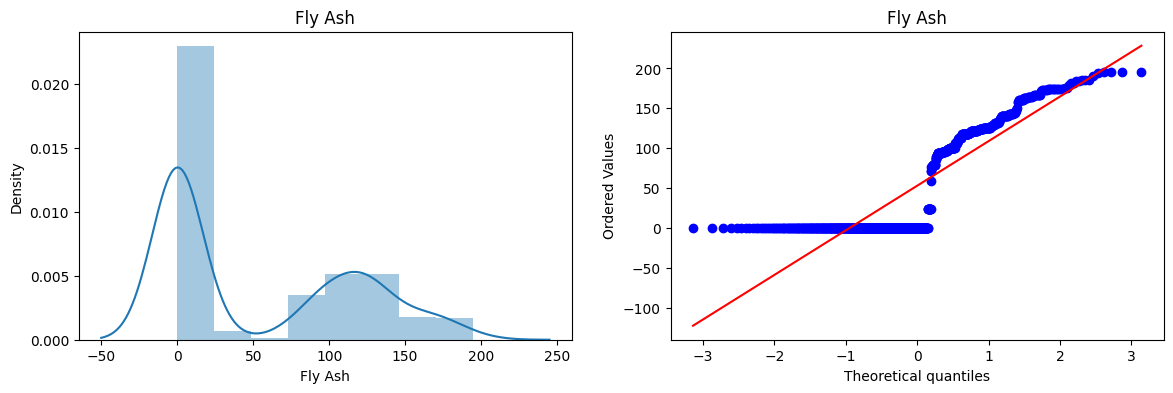

<ipython-input-96-f1bb624c0378>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


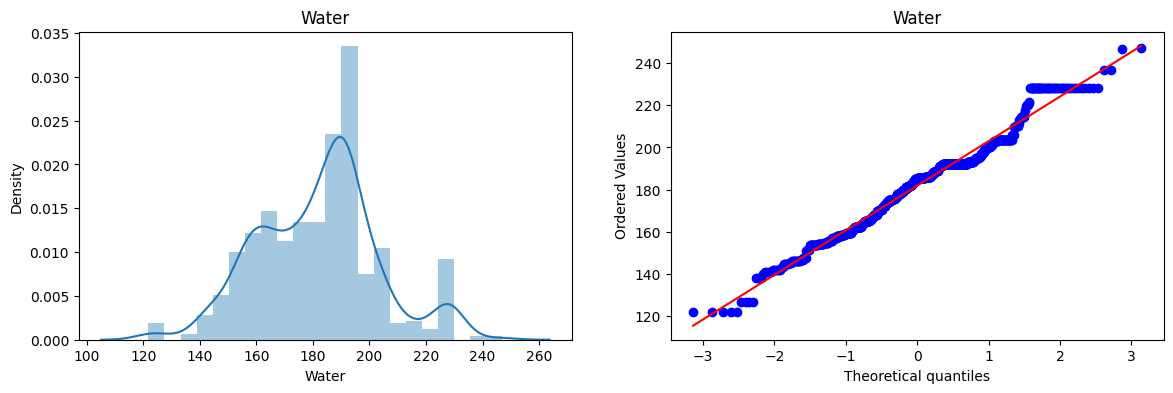

<ipython-input-96-f1bb624c0378>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


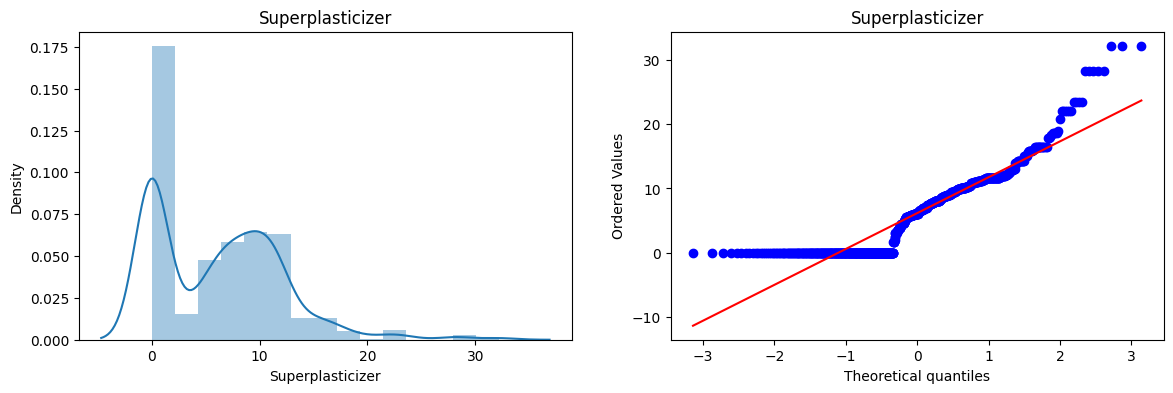

<ipython-input-96-f1bb624c0378>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


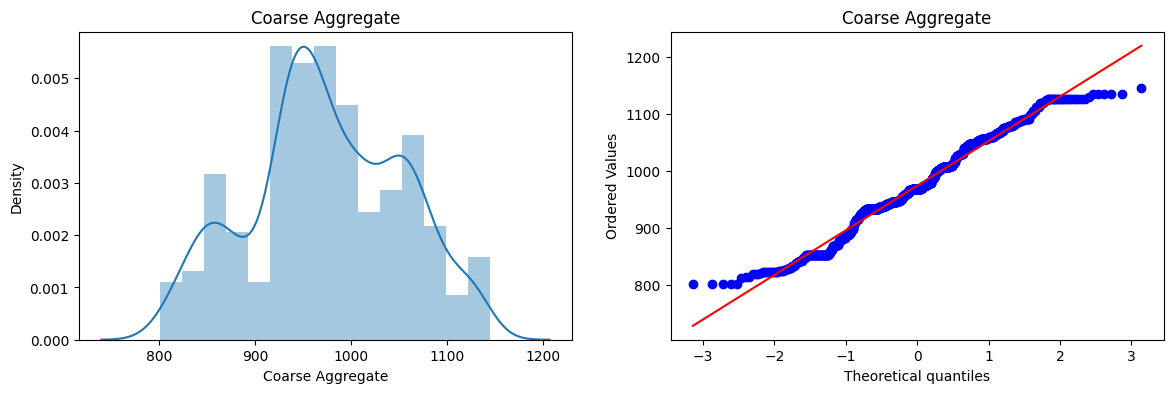

<ipython-input-96-f1bb624c0378>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


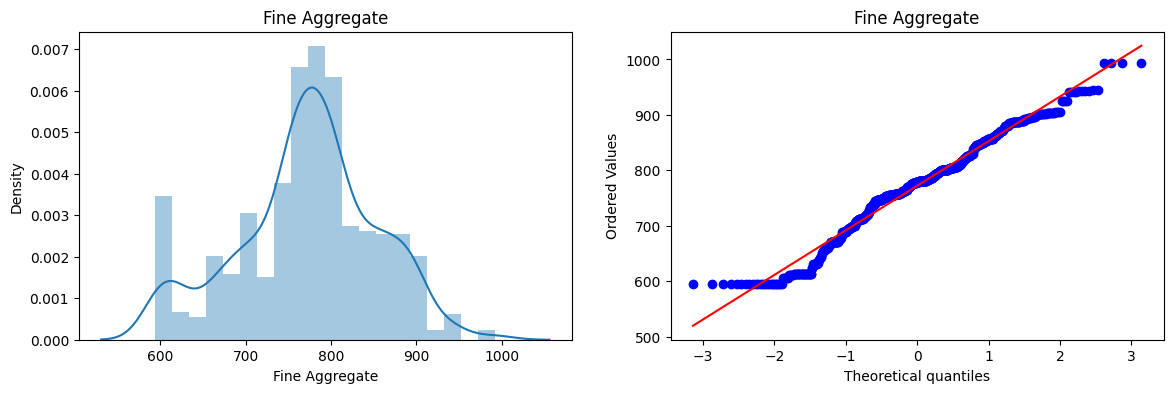

<ipython-input-96-f1bb624c0378>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


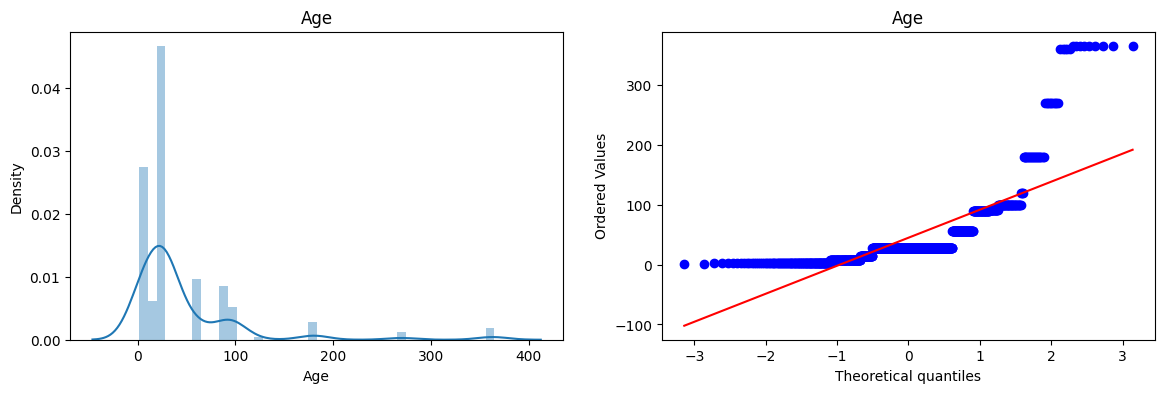

In [ ]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [ ]:
# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [ ]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.8047825011695535

In [ ]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6658537926845631

<ipython-input-100-61f577ce50e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-100-61f577ce50e3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


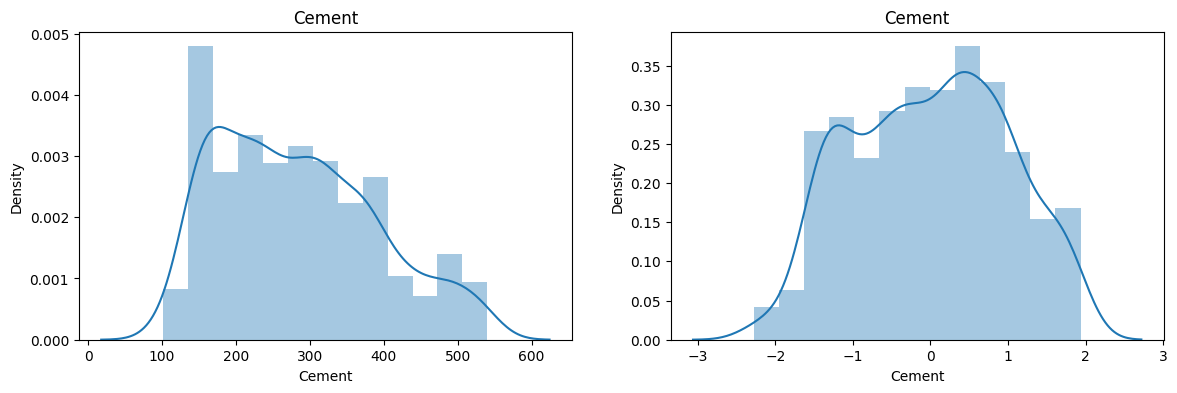

<ipython-input-100-61f577ce50e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-100-61f577ce50e3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


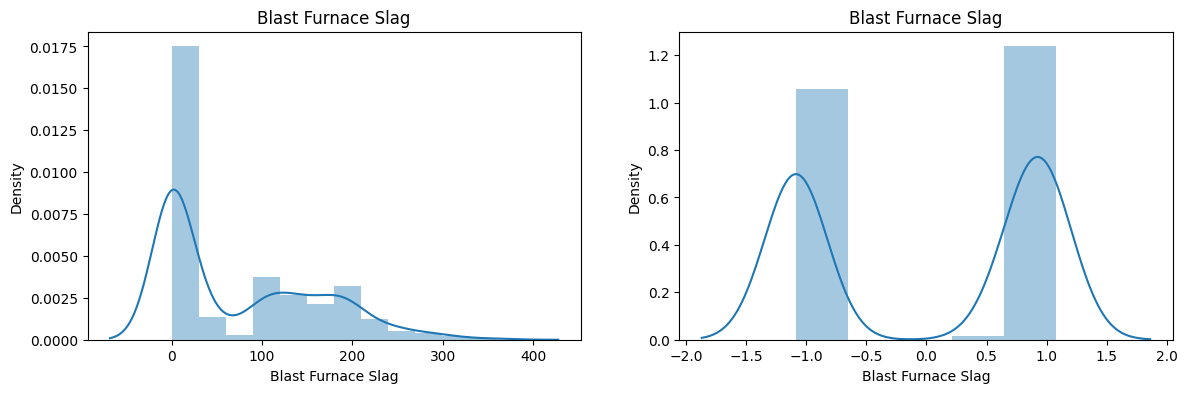

<ipython-input-100-61f577ce50e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-100-61f577ce50e3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


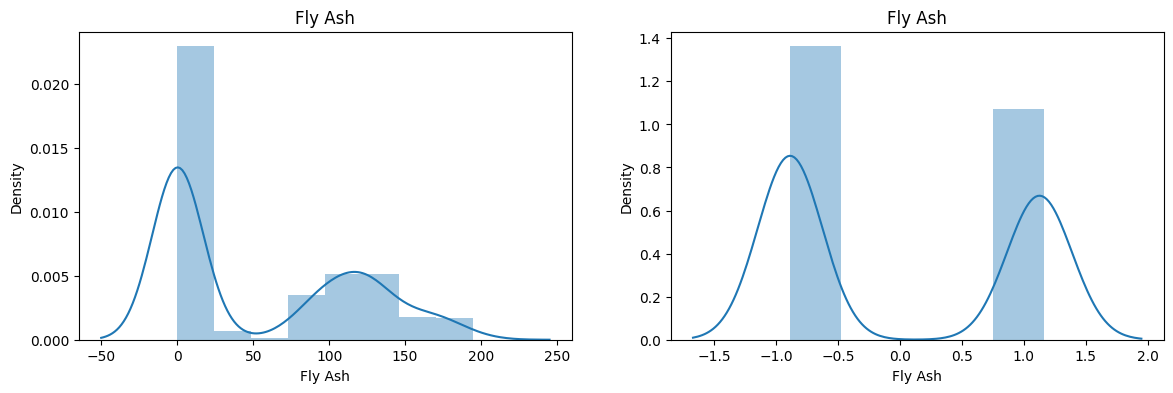

<ipython-input-100-61f577ce50e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-100-61f577ce50e3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


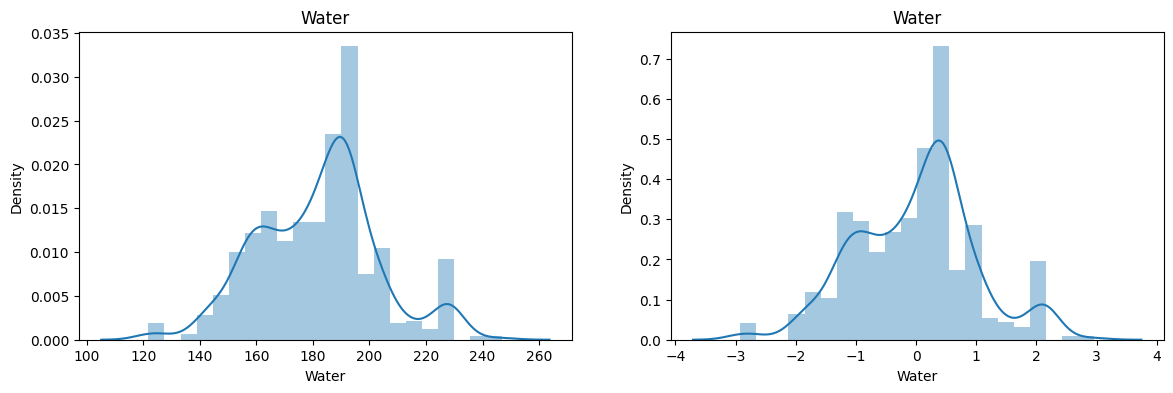

<ipython-input-100-61f577ce50e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-100-61f577ce50e3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


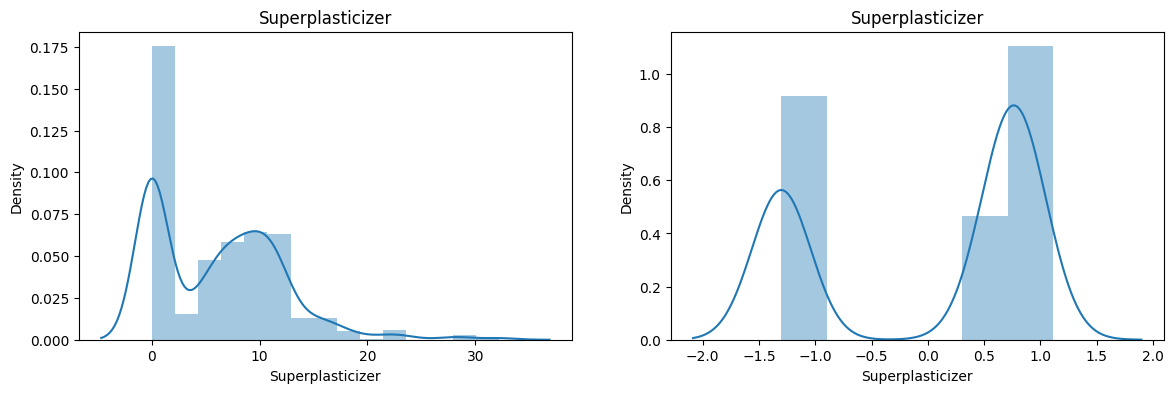

<ipython-input-100-61f577ce50e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-100-61f577ce50e3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


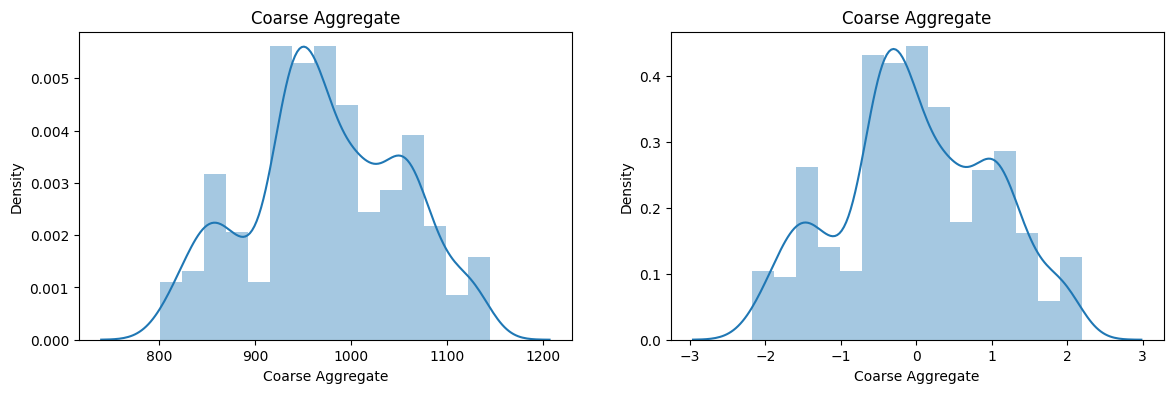

<ipython-input-100-61f577ce50e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-100-61f577ce50e3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


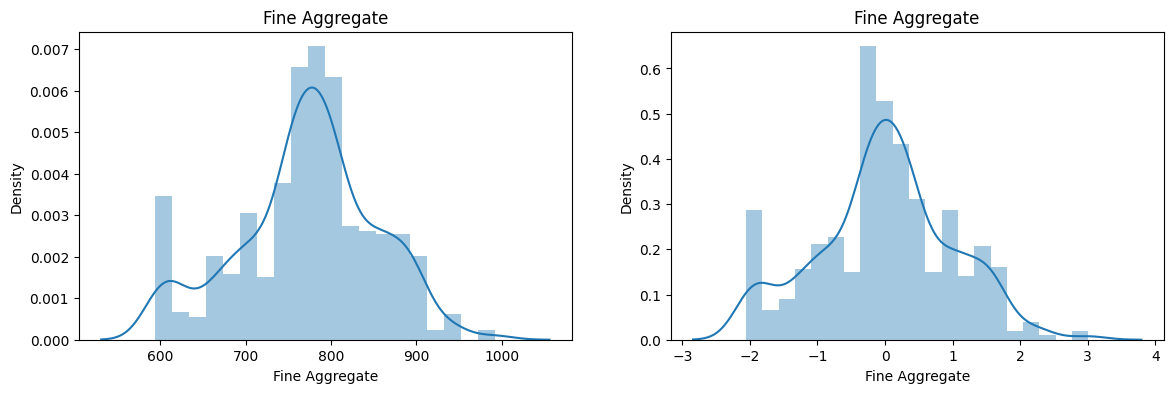

<ipython-input-100-61f577ce50e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-100-61f577ce50e3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


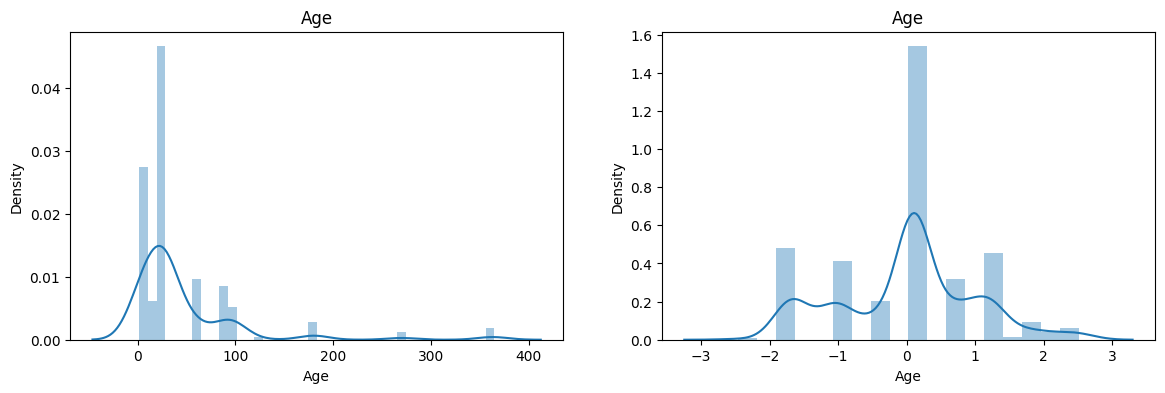

In [ ]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

In [ ]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906512004999


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [ ]:
# applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.6834625141500866

In [ ]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

<ipython-input-104-749d341304d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-104-749d341304d5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


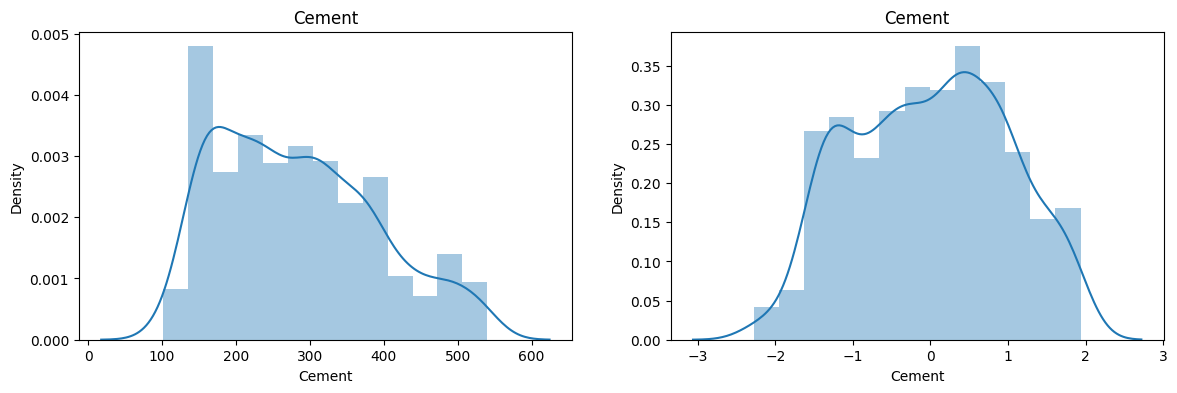

<ipython-input-104-749d341304d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-104-749d341304d5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


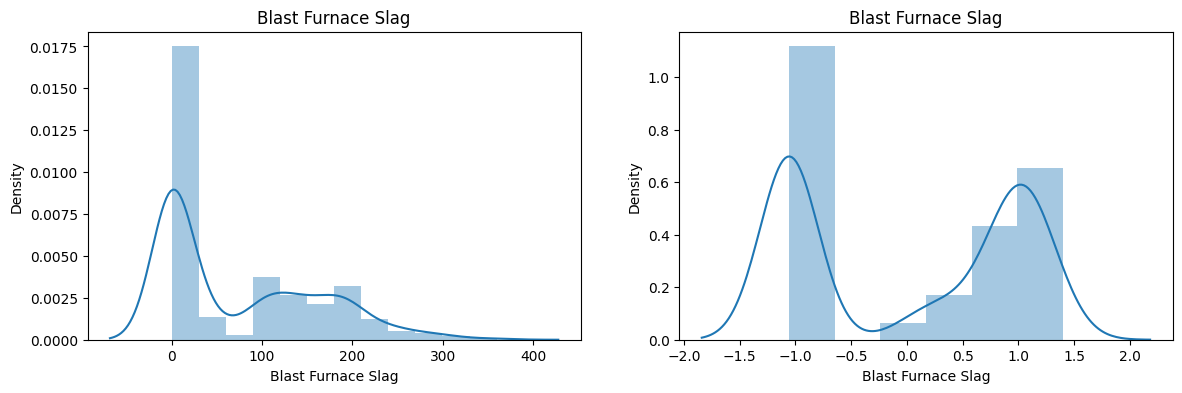

<ipython-input-104-749d341304d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-104-749d341304d5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


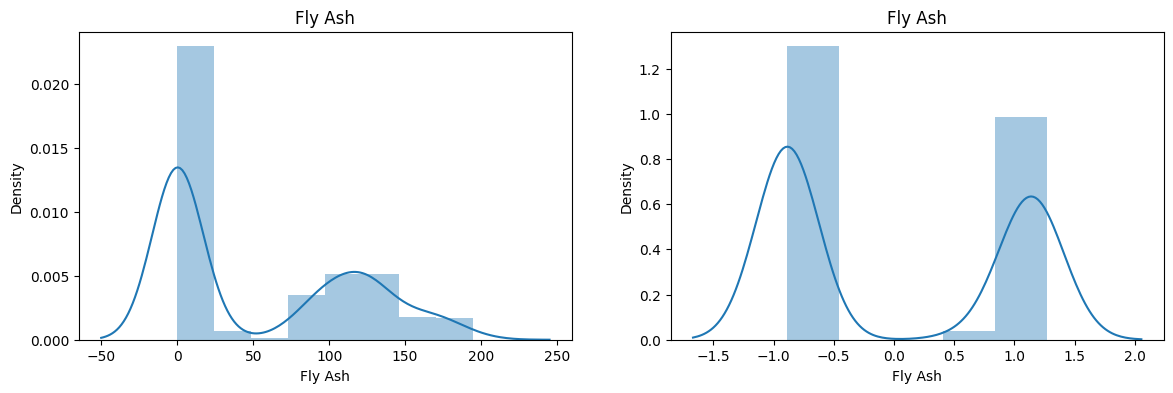

<ipython-input-104-749d341304d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-104-749d341304d5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


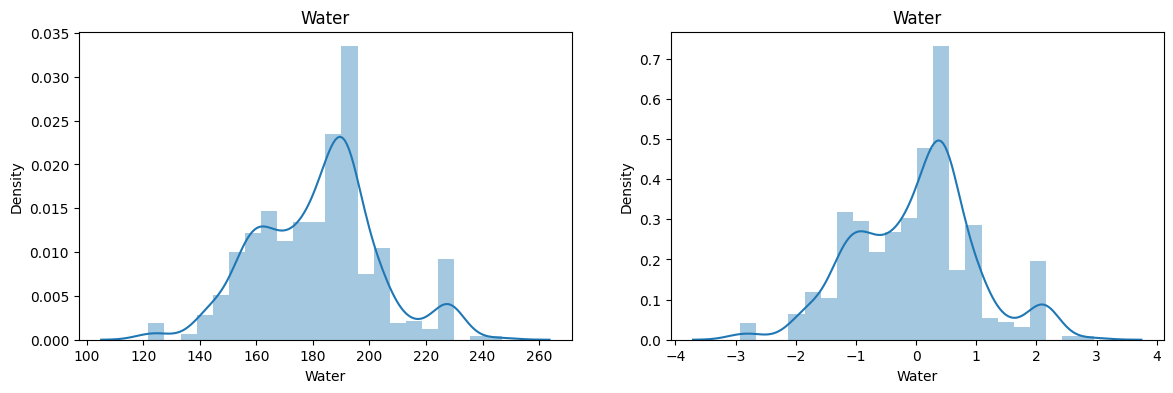

<ipython-input-104-749d341304d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-104-749d341304d5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


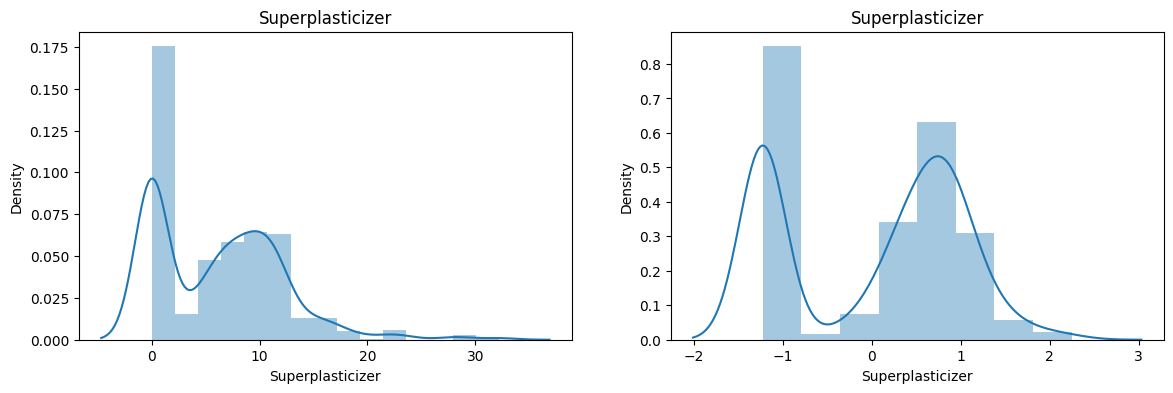

<ipython-input-104-749d341304d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-104-749d341304d5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


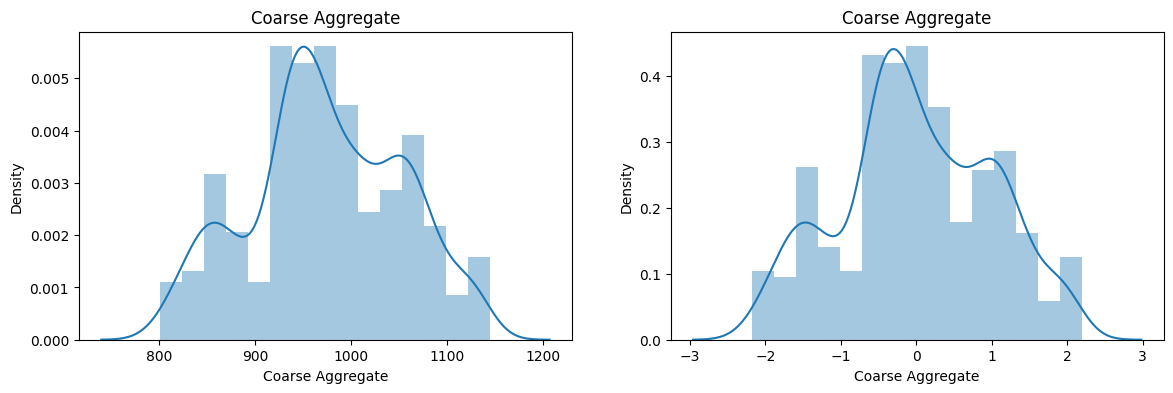

<ipython-input-104-749d341304d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-104-749d341304d5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


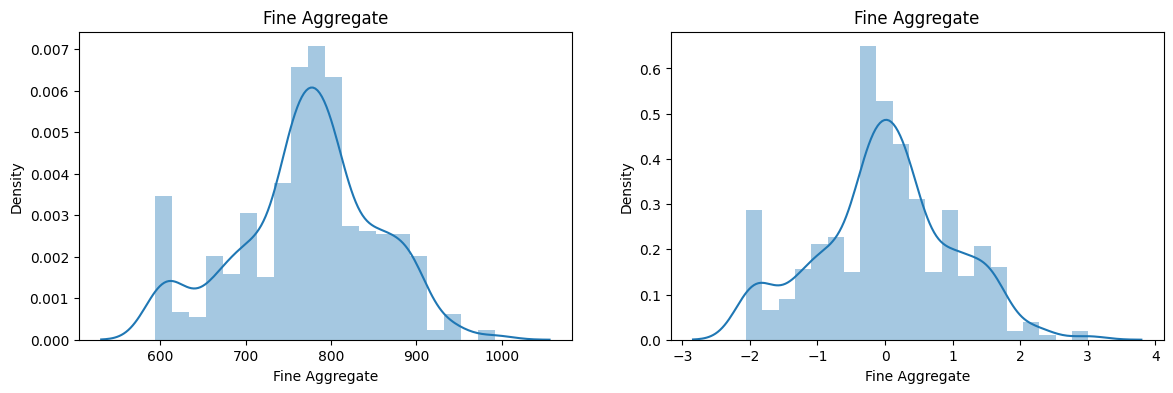

<ipython-input-104-749d341304d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-104-749d341304d5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


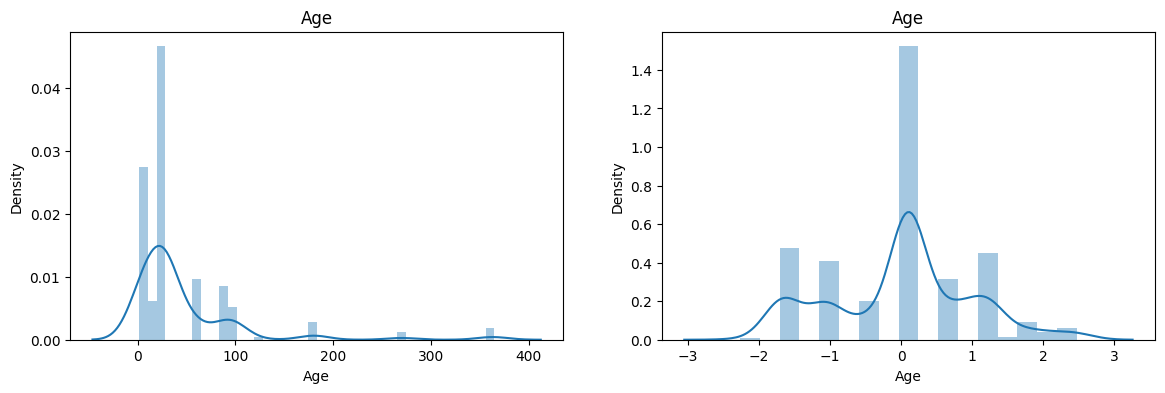

In [ ]:
# Before and after comparision for Yeo-Johnson

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(col)

    plt.show()

In [ ]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830763,1.783100
7,Age,0.001771,0.019885


**Central Limit Theorem**

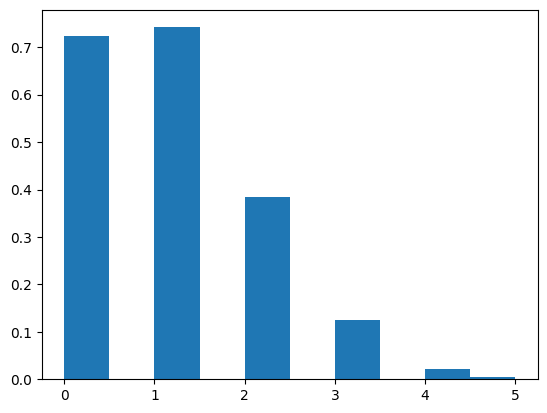

In [ ]:
n = 10  # number of trials
p = 0.1  # probability of success
size = 1000  # number of samples to generate

binomial_dist = np.random.binomial(n, p, size)

plt.hist(binomial_dist,density=True)
plt.show()

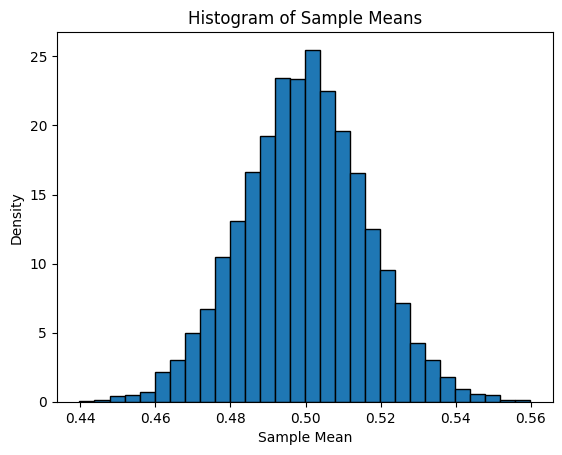

In [ ]:
# Set the parameters
num_samples = 10000
sample_size = 300
distribution_range = (0, 1)

# Generate samples from a uniform distribution
samples = np.random.uniform(distribution_range[0], distribution_range[1], (num_samples, sample_size))

# Calculate the sample means
sample_means = np.mean(samples, axis=1)

# Plot the histogram of the sample means
plt.hist(sample_means, bins=30, density=True, edgecolor='black')
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()


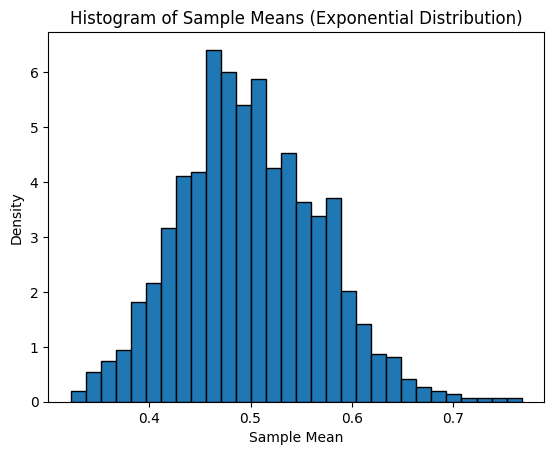

In [ ]:
# Set the parameters
num_samples = 1000
sample_size = 50
lambda_param = 2

# Generate samples from an exponential distribution
samples = np.random.exponential(scale=1/lambda_param, size=(num_samples, sample_size))

# Calculate the sample means
sample_means = np.mean(samples, axis=1)

# Plot the histogram of the sample means
plt.hist(sample_means, bins=30, density=True, edgecolor='black')
plt.title('Histogram of Sample Means (Exponential Distribution)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()

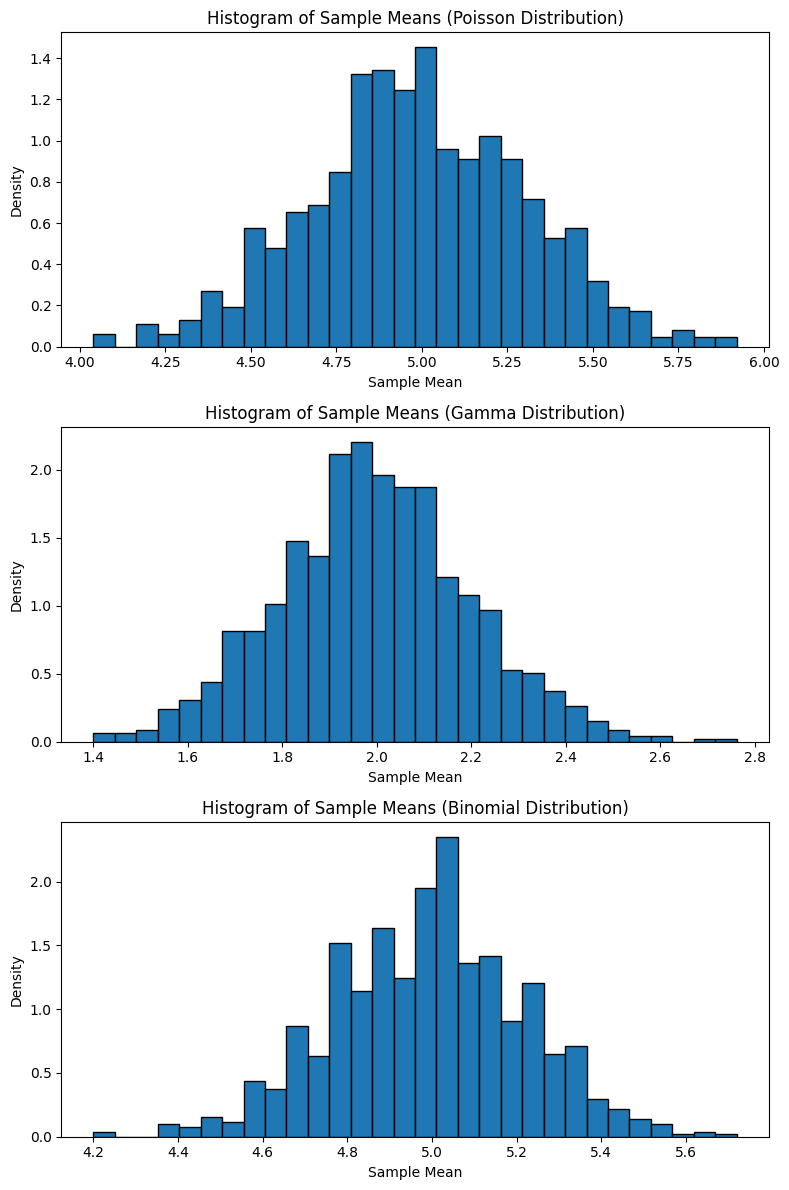

In [ ]:
# Set the parameters
num_samples = 1000
sample_size = 50

# Poisson distribution parameters
poisson_lambda = 5

# Gamma distribution parameters
gamma_shape = 2
gamma_scale = 1

# Binomial distribution parameters
binomial_n = 10
binomial_p = 0.5

# Generate samples from the distributions
poisson_samples = np.random.poisson(lam=poisson_lambda, size=(num_samples, sample_size))
gamma_samples = np.random.gamma(shape=gamma_shape, scale=gamma_scale, size=(num_samples, sample_size))
binomial_samples = np.random.binomial(n=binomial_n, p=binomial_p, size=(num_samples, sample_size))

# Calculate the sample means
poisson_means = np.mean(poisson_samples, axis=1)
gamma_means = np.mean(gamma_samples, axis=1)
binomial_means = np.mean(binomial_samples, axis=1)

# Plot the histograms of the sample means
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Poisson distribution
axs[0].hist(poisson_means, bins=30, density=True, edgecolor='black')
axs[0].set_title('Histogram of Sample Means (Poisson Distribution)')
axs[0].set_xlabel('Sample Mean')
axs[0].set_ylabel('Density')

# Gamma distribution
axs[1].hist(gamma_means, bins=30, density=True, edgecolor='black')
axs[1].set_title('Histogram of Sample Means (Gamma Distribution)')
axs[1].set_xlabel('Sample Mean')
axs[1].set_ylabel('Density')

# Binomial distribution
axs[2].hist(binomial_means, bins=30, density=True, edgecolor='black')
axs[2].set_title('Histogram of Sample Means (Binomial Distribution)')
axs[2].set_xlabel('Sample Mean')
axs[2].set_ylabel('Density')

# Adjust the layout and show the plot
fig.tight_layout()
plt.show()

In [ ]:
# Set the parameters
num_samples = 10000
sample_size = 50

# Gamma distribution parameters
gamma_shape = 2
gamma_scale = 1

# Calculate the theoretical mean and variance
theoretical_mean = gamma_shape * gamma_scale
theoretical_variance = (gamma_shape * gamma_scale ** 2)

# Generate samples from the Gamma distribution
samples = np.random.gamma(shape=gamma_shape, scale=gamma_scale, size=(num_samples, sample_size))

# Calculate the sample means
sample_means = np.mean(samples, axis=1)

# Calculate the empirical mean and variance of the sample means
empirical_mean = np.mean(sample_means)
empirical_variance = np.var(sample_means)

# Compare the theoretical and empirical values
print(f"Theoretical mean: {theoretical_mean:.4f}")
print(f"Empirical mean: {empirical_mean:.4f}")
print(f"\n")
print(f"Theoretical variance: {theoretical_variance:.4f}")
print(f"Empirical variance: {empirical_variance:.4f}")

Theoretical mean: 2.0000
Empirical mean: 1.9978


Theoretical variance: 2.0000
Empirical variance: 0.0391


In [ ]:
# Set the parameters
num_samples = 10000
sample_size = 50

# Log-Normal distribution parameters
mu = 0.5
sigma = 0.7

# Calculate the theoretical mean and variance
theoretical_mean = np.exp(mu + (sigma ** 2) / 2)
theoretical_variance = (np.exp(sigma ** 2) - 1) * np.exp(2 * mu + sigma ** 2)

# Generate samples from the Log-Normal distribution
samples = np.random.lognormal(mean=mu, sigma=sigma, size=(num_samples, sample_size))

# Calculate the sample means
sample_means = np.mean(samples, axis=1)

# Calculate the empirical mean and variance of the sample means
empirical_mean = np.mean(sample_means)
empirical_variance = np.var(sample_means)

# Compare the theoretical and empirical values
print(f"Theoretical mean: {theoretical_mean:.4f}")
print(f"Empirical mean: {empirical_mean:.4f}")
print(f"\n")
print(f"Theoretical variance: {theoretical_variance:.4f}")
print(f"Empirical variance: {empirical_variance:.4f}")

Theoretical mean: 2.1064
Empirical mean: 2.1101


Theoretical variance: 2.8056
Empirical variance: 0.0565


In [ ]:
# Set the parameters
population_size = 100000
sample_size = 50
num_samples = 100

# Generate a random representative sample of salaries (in thousands)
# You should replace this with actual collected salary data
np.random.seed(42)  # Setting a seed for reproducibility
population_salaries = np.random.lognormal(mean=4.5, sigma=0.8, size=population_size)

# Generate multiple samples and calculate the sample means and standard deviations
sample_means = []
sample_std_devs = []

for _ in range(num_samples):
  sample_salaries = np.random.choice(population_salaries, size=sample_size)
  sample_means.append(np.mean(sample_salaries))
  sample_std_devs.append(np.std(sample_salaries))

# Calculate the average of the sample means and the standard error
average_sample_means = np.mean(sample_means)
standard_error = np.std(sample_means) / np.sqrt(num_samples)

# Calculate the 95% confidence interval
margin_of_error = 1.96 * standard_error
lower_limit = average_sample_means - margin_of_error
upper_limit = average_sample_means + margin_of_error

# Report the results
print(f"Estimated average salary (in thousands): {average_sample_means:.2f}")
print(f"95% confidence interval (in thousands): ({lower_limit:.2f}, {upper_limit:.2f})")

Estimated average salary (in thousands): 124.74
95% confidence interval (in thousands): (121.23, 128.26)


**Case Study Titanic dataset**

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
df = pd.concat([train_df.drop(columns=['Survived']),test_df]).sample(1309)

<Axes: ylabel='Density'>

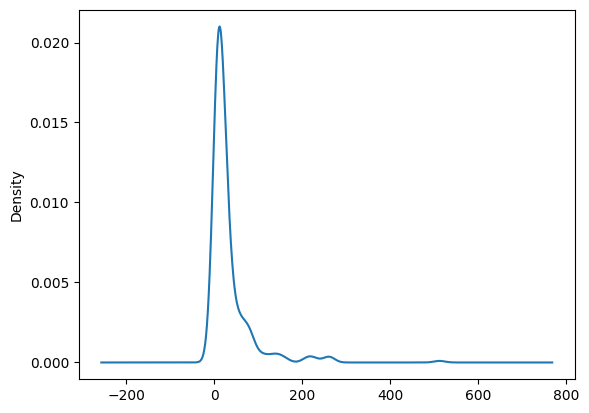

In [ ]:
df['Fare'].plot(kind='kde')

In [ ]:
# sample size = 50 -> 100 times
samples = []
for i in range(100):
    samples.append(df['Fare'].dropna().sample(50).values.tolist())

In [ ]:
samples = np.array(samples)

In [ ]:
sampling_means = samples.mean(axis=1)

In [ ]:
import seaborn as sns

<Axes: ylabel='Density'>

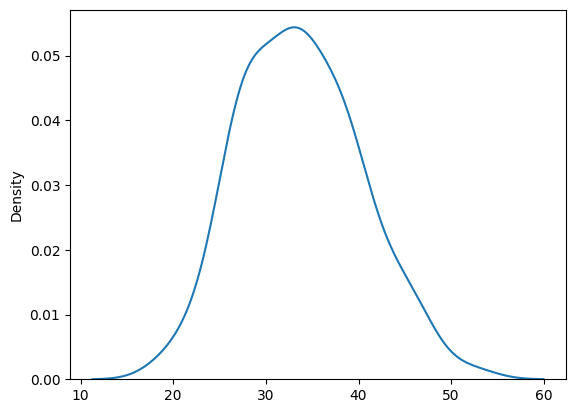

In [ ]:
sns.kdeplot(sampling_means)

In [ ]:
sampling_means.mean()

33.72439994

In [ ]:
sampling_means.std()/np.sqrt(50)

0.912217286651434

In [ ]:
lower_limit = sampling_means.mean() - 2*sampling_means.std()/np.sqrt(50)
upper_limit = sampling_means.mean() + 2*sampling_means.std()/np.sqrt(50)
print('The range is',lower_limit,'-',upper_limit)

The range is 31.89996536669713 - 35.548834513302864


In [ ]:
df['Fare'].dropna().mean()

33.29547928134557

**Single T-Test**

In [ ]:
from scipy.stats import t

# Set the t-value and degrees of freedom
t_value = -5.25
df = 58  # Replace this with your specific degrees of freedom

# Calculate the CDF value
cdf_value = t.cdf(t_value, df)
print(cdf_value*2)

2.256369746933224e-06


In [ ]:
train = pd.read_csv('/content/train.csv').drop(columns=['Survived'])
test = pd.read_csv('/content/test.csv')

In [ ]:
final_df = pd.concat([train,test]).sample(1309)

In [ ]:
pop = final_df['Age'].dropna()

In [ ]:
sample_age = pop.sample(25).values

In [ ]:
sample_age

array([33. , 28. , 40. , 10. , 26.5, 31. ,  3. , 25. , 51. , 33. , 27. ,
       22. , 18. , 50. , 45. , 33. , 20. , 45. , 17. , 22. , 16. , 59. ,
       47. , 21. , 17. ])

In [ ]:
# H0 -> The mean age is 35
# H1 -> The mean is less than 35

In [ ]:
# check for normality using Shapiro Wilk test
from scipy.stats import shapiro

shapiro_age = shapiro(sample_age)

print(shapiro_age)

ShapiroResult(statistic=0.9684513982896359, pvalue=0.6060940423433727)


In [ ]:
import scipy.stats as stats
pop_mean=35
t_statistic, p_value = stats.ttest_1samp(sample_age, pop_mean)

print("t-statistic:", t_statistic)
print("p-value:", p_value/2)

t-statistic: -1.934308475356452
p-value: 0.03247468947442833


In [ ]:
pop.mean()

29.881137667304014

In [ ]:
alpha = 0.05

if p_value/2 < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


**Independant Two Sample Test**

In [ ]:
# The Shapiro-Wilk test returns two values: the test statistic (W) and the p-value.
# If the p-value is greater than your chosen significance level (α = 0.05),
# you can assume the data comes from a normally distributed population.
# If the p-value is less than or equal to the significance level, the normality assumption is not met,
# and you should consider applying a data transformation or using a non-parametric test like the Mann-Whitney U test.


from scipy.stats import shapiro

# Input the data as lists
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

# Perform the Shapiro-Wilk test for both desktop and mobile users
shapiro_desktop = shapiro(desktop_users)
shapiro_mobile = shapiro(mobile_users)

print("Shapiro-Wilk test for desktop users:", shapiro_desktop)
print("Shapiro-Wilk test for mobile users:", shapiro_mobile)


Shapiro-Wilk test for desktop users: ShapiroResult(statistic=0.9783115512411942, pvalue=0.7791003299808725)
Shapiro-Wilk test for mobile users: ShapiroResult(statistic=0.9714355768676655, pvalue=0.5791606602037616)


In [ ]:
# If the p-value from Levene's test is greater than your chosen significance level (α = 0.05), you can assume equal variances
#  If the p-value is less than or equal to the significance level, the assumption of equal variances is not met,
# and you should consider using Welch's t-test instead of the regular independent two-sample t-test.

from scipy.stats import levene

# Input the data as lists
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

# Perform Levene's test
levene_test = levene(desktop_users, mobile_users)
print(levene_test)

LeveneResult(statistic=2.94395488191752, pvalue=0.09153720526741761)


In [ ]:
pop_male = final_df[final_df['Sex'] == 'male']['Age'].dropna()
pop_female = final_df[final_df['Sex'] == 'female']['Age'].dropna()

In [ ]:
sample_male = pop_male.sample(25)
sample_female = pop_female.sample(25)

alpha = 0.05

In [ ]:
pop_male.mean()

30.58522796352584

In [ ]:
pop_female.mean()

28.68708762886598

In [ ]:
# Perform the Shapiro-Wilk test for both desktop and mobile users
shapiro_male = shapiro(sample_male)
shapiro_female = shapiro(sample_female)

print("Shapiro-Wilk test for desktop users:", shapiro_male)
print("Shapiro-Wilk test for mobile users:", shapiro_female)

Shapiro-Wilk test for desktop users: ShapiroResult(statistic=0.9061324608074024, pvalue=0.025009707715219064)
Shapiro-Wilk test for mobile users: ShapiroResult(statistic=0.9596940347067544, pvalue=0.4084144428658218)


In [ ]:
from scipy.stats import levene

# Perform Levene's test
levene_test = levene(sample_male, sample_female)
print(levene_test)

LeveneResult(statistic=0.6208710184270233, pvalue=0.4345978663121923)


In [ ]:
t_statistic, p_value = stats.ttest_ind(sample_male, sample_female)

print("t-statistic:", t_statistic)
print("p-value:", p_value/2)

t-statistic: -0.4887189376565281
p-value: 0.3136331263342972


In [ ]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.


**Paired Two Sample Test**

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

before = np.array([80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91])
after = np.array([78, 93, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88])

In [ ]:
differences = after - before

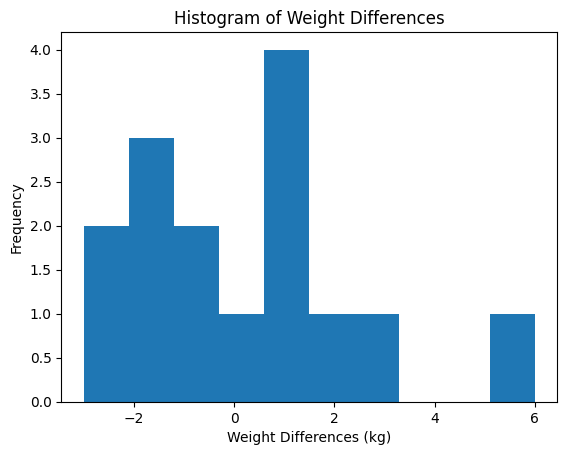

Shapiro-Wilk test: ShapiroResult(statistic=0.9220571486009436, pvalue=0.20704778986900568)


In [ ]:
plt.hist(differences)
plt.title("Histogram of Weight Differences")
plt.xlabel("Weight Differences (kg)")
plt.ylabel("Frequency")
plt.show()

shapiro_test = stats.shapiro(differences)
print("Shapiro-Wilk test:", shapiro_test)

In [ ]:
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)

In [ ]:
n = len(differences)
t_statistic = mean_diff / (std_diff / np.sqrt(n))
df = n - 1

In [ ]:
t_statistic

0.10482848367219182

In [ ]:
alpha = 0.05
p_value = stats.t.cdf(t_statistic, df)

In [ ]:
p_value

0.5410005146857456